In [279]:
import numpy as np
import math
from numpy.random import randint

from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ, Aer

from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.extensions import Initialize

from qiskit.quantum_info import partial_trace

from qiskit.tools.monitor import job_monitor
from qiskit.quantum_info.analysis import average_data

import matplotlib.pyplot as plt
%matplotlib inline




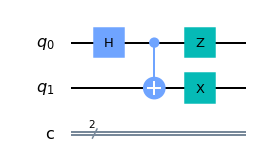

In [280]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(2,2)

qc.h(0)
qc.cx(0,1)
qc.z(0)
qc.x(1)



qc.draw(output='mpl')

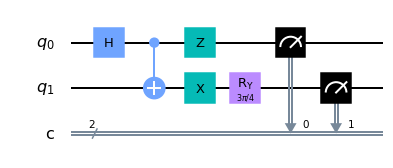

In [281]:
measureZZ = QuantumCircuit(2, 2)
#z  
measureZZ.ry(3*math.pi/4,1)
measureZZ.measure(0, 0)
measureZZ.measure(1, 1)
bellZZ = qc+measureZZ

bellZZ.draw(output='mpl')



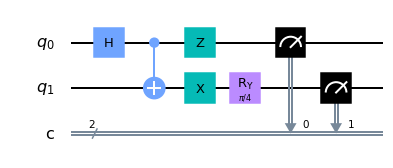

In [282]:
measureXX = QuantumCircuit(2, 2)
#z
measureXX.ry(1*math.pi/4,1)
measureXX.measure(0, 0)
measureXX.measure(1, 1)
bellXX = qc+measureXX

bellXX.draw(output='mpl')

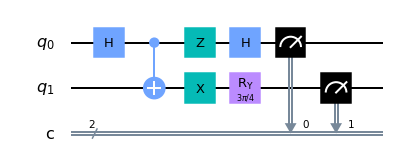

In [283]:
measureZX = QuantumCircuit(2, 2)
measureZX.h(0)
measureZX.ry(3*math.pi/4,1)
measureZX.measure(0, 0)
measureZX.measure(1, 1)
bellZX = qc+measureZX

bellZX.draw(output='mpl')


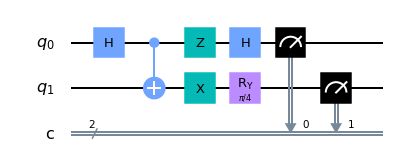

In [284]:
measureXZ = QuantumCircuit(2, 2)
measureXZ.h(0)
measureXZ.ry(1*math.pi/4,1)
measureXZ.measure(0, 0)
measureXZ.measure(1, 1)
bellXZ = qc+measureXZ

bellXZ.draw(output='mpl')

In [285]:
circuits = [bellZZ,bellXX,bellZX,bellXZ]

In [286]:
#observable_first ={'00': 1, '01': -1, '10': 1, '11': -1}
#observable_second ={'00': 1, '01': 1, '10': -1, '11': -1}
observable_correlated ={'00': 1, '01': -1, '10': -1, '11': 1}

In [287]:
job = execute(circuits, backend=Aer.get_backend('qasm_simulator'), shots=10000)
job_monitor(job)

Job Status: job has successfully run


In [288]:
result2 = job.result()
result2.get_counts() #equivalem aos seguintes resultados
#result2.get_counts(bellZZ)
#result2.get_counts(bellXX)
#result2.get_counts(bellZX)
#result2.get_counts(bellXZ)

[{'00': 4272, '01': 760, '10': 734, '11': 4234},
 {'00': 753, '01': 4235, '10': 4294, '11': 718},
 {'00': 4336, '01': 739, '10': 694, '11': 4231},
 {'00': 4314, '01': 743, '10': 747, '11': 4196}]

In [289]:
res1=(average_data(result2.get_counts(bellZZ),observable_correlated))
res2=(average_data(result2.get_counts(bellXX),observable_correlated))
res3=(average_data(result2.get_counts(bellZX),observable_correlated))
res4=(average_data(result2.get_counts(bellXZ),observable_correlated))

s= -res2 +res3 +res4 +res1;
s=str(s)

res1=str(res1)
res2=str(res2)
res3=str(res3)
res4=str(res4)

print('res1 = ' + res1)
print('res2 = ' + res2)
print('res3 = ' + res3)
print('res4 = ' + res4)
print('s=' + s)

res1 = 0.7012
res2 = -0.7058
res3 = 0.7134
res4 = 0.702
s=2.8224


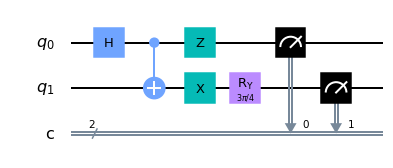

In [290]:
##########################################################################   espiã eva

measureZZ2 = QuantumCircuit(2, 2)

eva = randint(2, size=1)  #primeiro qubit

#if (eva==1):
    #nada 
if (eva==0):
        measureZZ2.x(0)
        measureZZ2.ry(3*math.pi/4,0)     
        
eva = randint(2, size=1)  #segundo qubit

if (eva==1):
    measureZZ2.ry(3*math.pi/4,1)      
if (eva==0):
    measureZZ2.x(1)


measureZZ2.measure(0, 0)
measureZZ2.measure(1, 1)
bellZZ2 = qc+measureZZ2

bellZZ2.draw(output='mpl')

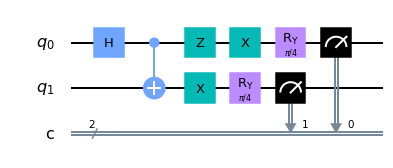

In [291]:
measureXX2 = QuantumCircuit(2, 2)

eva = randint(2, size=1) #primeiro qubit

#if (eva==1):
    #nada 
if (eva==0):
        measureXX2.x(0)
        measureXX2.ry(1*math.pi/4,0)
     
        
eva = randint(2, size=1) #segundo qubit

if (eva==1):
    measureXX2.ry(1*math.pi/4,1)      
if (eva==0):
    measureXX2.x(1)


measureXX2.measure(0, 0)
measureXX2.measure(1, 1)
bellXX2 = qc+measureXX2

bellXX2.draw(output='mpl')

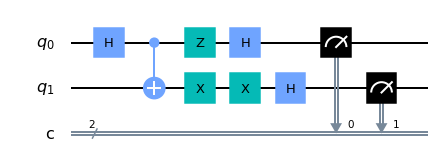

In [292]:
measureZX2 = QuantumCircuit(2, 2)

eva = randint(2, size=1)  #primeiro qubit

if (eva==1):
    measureZX2.h(0)
if (eva==0):
    measureZX2.x(0)
    measureZX2.ry(3*math.pi/4,0)
    
    
eva = randint(2, size=1)  #segundo qubit

if (eva==1):
    measureZX2.ry(3*math.pi/4,1)
if (eva==0):
    measureZX2.x(1)
    measureZX2.h(1)
    
    
measureZX2.measure(0, 0)
measureZX2.measure(1, 1)
bellZX2 = qc+measureZX2

bellZX2.draw(output='mpl')

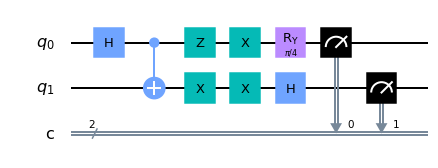

In [293]:
measureXZ2 = QuantumCircuit(2, 2)

eva = randint(2, size=1)  #primeiro qubit

if (eva==1):
    measureXZ2.h(0)
if (eva==0):
    measureXZ2.x(0)
    measureXZ2.ry(1*math.pi/4,0)

    
eva = randint(2, size=1) #segundo qubit
    
if (eva==1):
    measureXZ2.ry(1*math.pi/4,1)
if (eva==0):
    measureXZ2.x(1)
    measureXZ2.h(1)

measureXZ2.measure(0, 0)
measureXZ2.measure(1, 1)
bellXZ2 = qc+measureXZ2

bellXZ2.draw(output='mpl')

In [294]:
circuits2 = [bellZZ2,bellXX2,bellZX2,bellXZ2]
job2 = execute(circuits2, backend=Aer.get_backend('qasm_simulator'), shots=10000)
job_monitor(job2)

Job Status: job has successfully run


In [295]:
result22 = job2.result()
result22.get_counts() #equivalem aos seguintes resultados
#result22.get_counts(bellZZ2)
#result22.get_counts(bellXX2)
#result22.get_counts(bellZX2)
#result22.get_counts(bellXZ2)

[{'00': 4311, '01': 745, '10': 699, '11': 4245},
 {'00': 2539, '01': 2512, '10': 2460, '11': 2489},
 {'01': 5049, '10': 4951},
 {'00': 4099, '01': 757, '10': 784, '11': 4360}]

In [296]:
res11=(average_data(result22.get_counts(bellZZ2),observable_correlated))
res22=(average_data(result22.get_counts(bellXX2),observable_correlated))
res33=(average_data(result22.get_counts(bellZX2),observable_correlated))
res44=(average_data(result22.get_counts(bellXZ2),observable_correlated))

s2= -res22+res33+res44 +res11;
s2=str(s2)

res11=str(res11)
res22=str(res22)
res33=str(res33)
res44=str(res44)

print('res11 = ' + res11)
print('res22 = ' + res22)
print('res33 = ' + res33)
print('res44 = ' + res44)
print('s2=' + s2)

res11 = 0.7111999999999999
res22 = 0.005600000000000049
res33 = -1.0
res44 = 0.6918
s2=0.39739999999999986
